# 4. Regression Modeling - Song Attributes

In [11]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import time
import re

# bs4, nltk, and sklearn imports
from bs4 import BeautifulSoup   
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn import metrics
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, BaggingClassifier, RandomForestRegressor, RandomForestClassifier, AdaBoostClassifier, AdaBoostRegressor
from sklearn.svm import SVC, SVR
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

#pd.set_option("display.max_rows", None, "display.max_columns", None)

In [12]:
giant_ordered_df = pd.read_csv('giant_ordered_df.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
giant_ordered_df.head()

,Unnamed: 0,artist,album,track_name,danceability,energy,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,acousticness,popularity
0,0,24kGoldn,Mood (feat. Iann Dior),Mood (feat. Iann Dior),0.700,0.722,-3.558,0,0.0369,0.000000,0.2720,0.756,90.989,140526,4,0.221,100.0
1,1,DaBaby,BLAME IT ON BABY,ROCKSTAR (feat. Roddy Ricch),0.746,0.690,-7.956,1,0.1640,0.000000,0.1010,0.497,89.977,181733,4,0.247,96.0
2,2,Justin Bieber,Holy,Holy (feat. Chance The Rapper),0.673,0.704,-8.056,1,0.3600,0.000000,0.0898,0.372,86.919,212093,4,0.196,93.0
3,3,Ariana Grande,Stuck with U,Stuck with U (with Justin Bieber),0.597,0.450,-6.658,1,0.0418,0.000000,0.3820,0.537,178.765,228482,3,0.223,90.0
4,4,Pop Smoke,Shoot For The Stars Aim For The Moon,What You Know Bout Love,0.709,0.548,-8.493,1,0.3530,0.000002,0.1330,0.543,83.995,160000,4,0.650,88.0


In [14]:
giant_ordered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149310 entries, 0 to 149309
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        149310 non-null  int64  
 1   artist            149310 non-null  object 
 2   album             695 non-null     object 
 3   track_name        149310 non-null  object 
 4   danceability      149310 non-null  float64
 5   energy            149310 non-null  float64
 6   loudness          149310 non-null  float64
 7   mode              149310 non-null  int64  
 8   speechiness       149310 non-null  float64
 9   instrumentalness  149310 non-null  float64
 10  liveness          149310 non-null  float64
 11  valence           149310 non-null  float64
 12  tempo             149310 non-null  float64
 13  duration_ms       149310 non-null  int64  
 14  time_signature    149310 non-null  object 
 15  acousticness      149310 non-null  float64
 16  popularity        14

In [15]:
song_features = ['danceability','energy','loudness','speechiness',
                 'instrumentalness', 'liveness', 'valence', 'tempo',
                'mode','duration_ms','acousticness']

In [16]:
X = giant_ordered_df[song_features]
y = giant_ordered_df['popularity']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [18]:
ss = StandardScaler()

ss.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [19]:
ss.mean_

array([ 5.36737636e-01,  5.52945596e-01, -1.03567133e+01,  1.30806922e-01,
        1.80468842e-01,  2.28217216e-01,  4.48744690e-01,  1.16924923e+02,
        6.59918558e-01,  2.37686067e+05,  4.14008138e-01])

In [20]:
ss.scale_

array([1.92568787e-01, 2.80036057e-01, 6.59727919e+00, 2.09881421e-01,
       3.29241832e-01, 2.14711121e-01, 2.69348142e-01, 3.13166084e+01,
       4.73736271e-01, 1.34446289e+05, 3.70389701e-01])

In [21]:
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

### Linear Regression

In [22]:
linreg = LinearRegression()

In [23]:
linreg.fit(X_train_sc,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
print(f'Training Score: {linreg.score(X_train_sc, y_train)}')
print(f'Testing Score: {linreg.score(X_test_sc, y_test)}')

Training Score: 0.21166877804753859
Testing Score: 0.20940440446486508


In [25]:
linregpred = linreg.predict(X)
linregtrainpred = linreg.predict(X_train_sc)
linregtestpred = linreg.predict(X_test_sc)

In [26]:
print('RMSE:', metrics.mean_squared_error(y, linregpred, squared=False))
print('Train RMSE:', metrics.mean_squared_error(y_train, linregtrainpred, squared=False))
print('Test RMSE:', metrics.mean_squared_error(y_test, linregtestpred, squared=False))

RMSE: 103843.2399415301
Train RMSE: 15.49142803680425
Test RMSE: 15.562123124641111


### KNR

In [27]:
knr = KNeighborsRegressor()

In [28]:
knr.fit(X_train_sc,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [29]:
print(f'Training Score: {knr.score(X_train_sc, y_train)}')
print(f'Testing Score: {knr.score(X_test_sc, y_test)}')

Training Score: 0.48622940729827613
Testing Score: 0.21945499235890573


In [30]:
knrpred = knr.predict(X)
knrtrainpred = knr.predict(X_train_sc)
knrtestpred = knr.predict(X_test_sc)

In [31]:
print('RMSE:', metrics.mean_squared_error(y, knrpred, squared=False))
print('Train RMSE:', metrics.mean_squared_error(y_train, knrtrainpred, squared=False))
print('Test RMSE:', metrics.mean_squared_error(y_test, knrtestpred, squared=False))

RMSE: 19.8921136412954
Train RMSE: 12.50609465822879
Test RMSE: 15.462888595064836


### Decision Tree

In [32]:
dt = DecisionTreeRegressor(random_state=42)

In [33]:
dt.fit(X_train_sc, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [34]:
print(f'Training Score: {dt.score(X_train_sc, y_train)}')
print(f'Testing Score: {dt.score(X_test_sc, y_test)}')

Training Score: 0.9988842895394873
Testing Score: -0.31122584507184237


In [35]:
dtpred = dt.predict(X)
dttrainpred = dt.predict(X_train)
dttestpred = dt.predict(X_test)

In [36]:
print('RMSE:', metrics.mean_squared_error(y, dtpred, squared=False))
print('Train RMSE:', metrics.mean_squared_error(y_train, dttrainpred, squared=False))
print('Test RMSE:', metrics.mean_squared_error(y_test, dttestpred, squared=False))

RMSE: 24.613831624787018
Train RMSE: 24.63044571029021
Test RMSE: 24.563922837903053


### Bagged Decision Trees

In [37]:
bag = BaggingRegressor(random_state=42, n_estimators=100) 

In [38]:
bag.fit(X_train_sc, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=100,
                 n_jobs=None, oob_score=False, random_state=42, verbose=0,
                 warm_start=False)

In [39]:
print(f'Training Score: {bag.score(X_train_sc, y_train)}')
print(f'Testing Score: {bag.score(X_test_sc, y_test)}')

Training Score: 0.9082099989097917
Testing Score: 0.34629184788331546


In [40]:
bagpred = bag.predict(X)
bagtrainpred = bag.predict(X_train)
bagtestpred = bag.predict(X_test)

In [41]:
print('RMSE:', metrics.mean_squared_error(y, bagpred, squared=False))
print('Train RMSE:', metrics.mean_squared_error(y_train, bagtrainpred, squared=False))
print('Test RMSE:', metrics.mean_squared_error(y_test, bagtestpred, squared=False))

RMSE: 17.29096830496528
Train RMSE: 17.272774506044097
Test RMSE: 17.345434228935705


### Random Forest

In [42]:
rfc = RandomForestRegressor(random_state=42) 

In [43]:
rfc.fit(X_train_sc, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [44]:
print(f'Training Score: {rfc.score(X_train_sc, y_train)}')
print(f'Testing Score: {rfc.score(X_test_sc, y_test)}')

Training Score: 0.9081066334773302
Testing Score: 0.3461899061990311


In [45]:
rfcpred = rfc.predict(X)
rfctrainpred = rfc.predict(X_train)
rfctestpred = rfc.predict(X_test)

In [46]:
print('RMSE:', metrics.mean_squared_error(y, rfcpred, squared=False))
print('Train RMSE:', metrics.mean_squared_error(y_train, rfctrainpred, squared=False))
print('Test RMSE:', metrics.mean_squared_error(y_test, rfctestpred, squared=False))

RMSE: 17.06330188020924
Train RMSE: 17.044136046401707
Test RMSE: 17.12066962742249


### AdaBoost

In [47]:
AdaBoost = AdaBoostRegressor(random_state=42)

In [48]:
AdaBoost.fit(X_train_sc, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=42)

In [49]:
print(f'Training Score: {AdaBoost.score(X_train_sc, y_train)}')
print(f'Testing Score: {AdaBoost.score(X_test_sc, y_test)}')

Training Score: 0.24349123903622516
Testing Score: 0.23581696473273814


In [50]:
AdaBoostpred = AdaBoost.predict(X)
AdaBoosttrainpred = AdaBoost.predict(X_train)
AdaBoosttestpred = AdaBoost.predict(X_test)

In [51]:
print('RMSE:', metrics.mean_squared_error(y, AdaBoostpred, squared=False))
print('Train RMSE:', metrics.mean_squared_error(y_train, AdaBoosttrainpred, squared=False))
print('Test RMSE:', metrics.mean_squared_error(y_test, AdaBoosttestpred, squared=False))

RMSE: 17.56336705821369
Train RMSE: 17.545100275279864
Test RMSE: 17.618052795812485


### Neural Network

In [52]:
model = Sequential()
model.add(Dense(128, # How many neurons we want in the first layer 
               activation='relu',
               input_shape=(11, )))
model.add(Dense(1, activation=None))

In [53]:
model.compile(loss='mse', optimizer="adam", metrics=['acc'])

In [54]:
print(X_train_sc.shape)
print(X_test_sc.shape)

(111982, 11)
(37328, 11)


In [55]:
print(y_train.shape)
print(y_test.shape)

(111982,)
(37328,)


In [56]:
history = model.fit(X_train_sc, y_train,
         epochs=10,
         batch_size=32,
         validation_data=(X_test_sc, y_test))

Epoch 1/10
3500/3500 [==============================] - 5s 1ms/step - loss: 307.0652 - acc: 0.0075 - val_loss: 223.7663 - val_acc: 0.0071
Epoch 2/10
3500/3500 [==============================] - 8s 2ms/step - loss: 217.3026 - acc: 0.0074 - val_loss: 218.3688 - val_acc: 0.0072
Epoch 3/10
3500/3500 [==============================] - 5s 1ms/step - loss: 213.4272 - acc: 0.0074 - val_loss: 215.2651 - val_acc: 0.0072
Epoch 4/10
3500/3500 [==============================] - 6s 2ms/step - loss: 211.3465 - acc: 0.0074 - val_loss: 214.6905 - val_acc: 0.0072
Epoch 5/10
3500/3500 [==============================] - 4s 1ms/step - loss: 209.9790 - acc: 0.0074 - val_loss: 213.0052 - val_acc: 0.0072
Epoch 6/10
3500/3500 [==============================] - 5s 1ms/step - loss: 208.9396 - acc: 0.0074 - val_loss: 212.1715 - val_acc: 0.0072
Epoch 7/10
3500/3500 [==============================] - 5s 1ms/step - loss: 208.0673 - acc: 0.0075 - val_loss: 212.5570 - val_acc: 0.0072
Epoch 8/10
3500/3500 [============

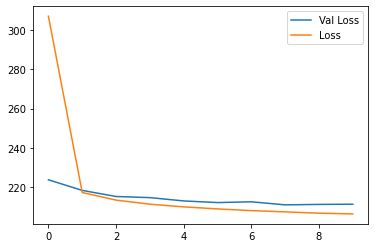

In [57]:
# Generates a line plot
plt.plot(history.history['val_loss'], label='Val Loss') # on test data
plt.plot(history.history['loss'], label='Loss') # on train data
plt.legend();

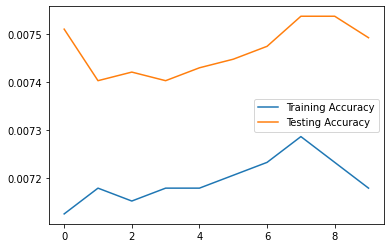

In [58]:
plt.plot(history.history['val_acc'], label='Training Accuracy') # on test data
plt.plot(history.history['acc'], label='Testing Accuracy') # on train data
plt.legend();